In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

np.set_printoptions(suppress = True, linewidth = 100, precision = 2)

In [2]:
df = pd.read_csv('credit_train.csv')

In [3]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Section 1: Explore the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

<Axes: xlabel='Loan Status', ylabel='count'>

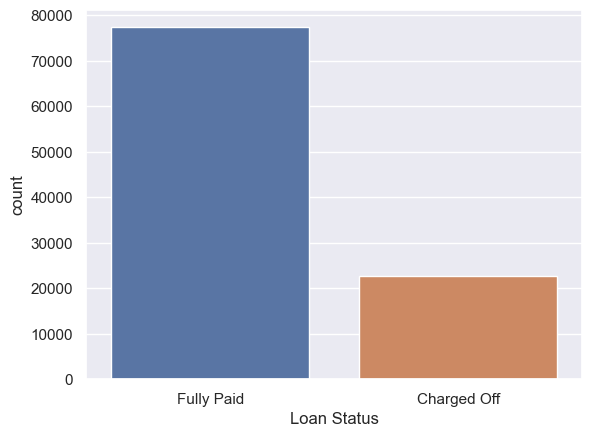

In [5]:
sns.countplot(x = 'Loan Status', data = df)

<Axes: >

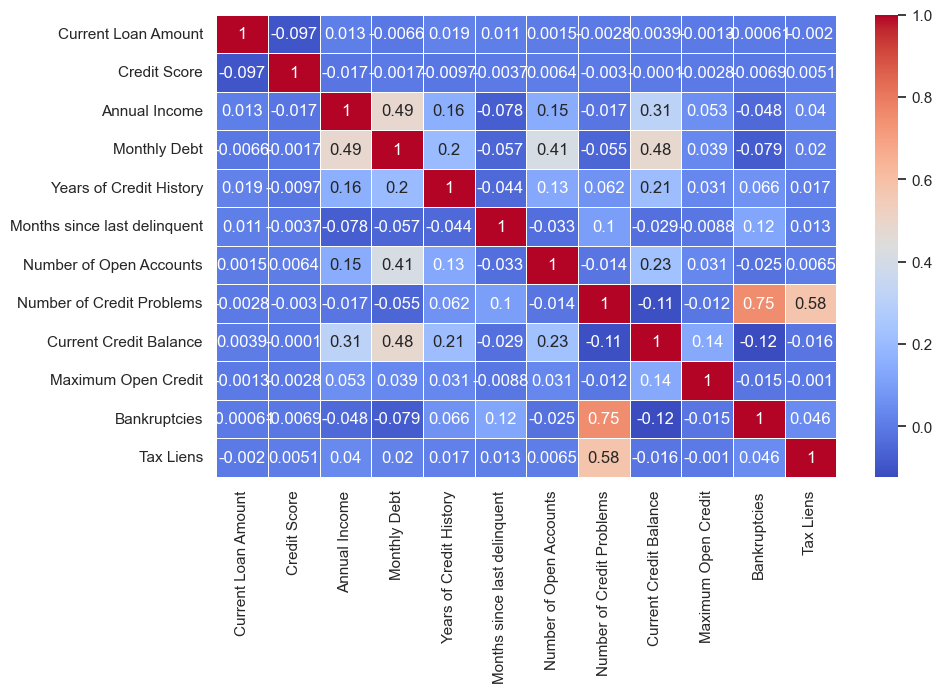

In [6]:
plt.figure(figsize = (10,6))
correlation_matrix = df.select_dtypes(include = 'number').corr()
sns.heatmap(data = correlation_matrix, annot = True,cmap='coolwarm', linewidths=0.5)

<Axes: xlabel='Bankruptcies', ylabel='Number of Credit Problems'>

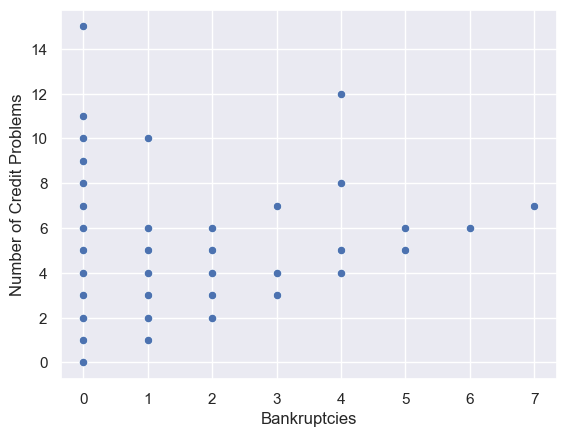

In [7]:
sns.scatterplot(data= df, x = 'Bankruptcies', y = 'Number of Credit Problems')

In [8]:
df.groupby('Loan Status').describe()

Current Loan Amount                                       \
                          count          mean           std      min   
Loan Status                                                            
Charged Off             22639.0  3.249752e+05  1.859059e+05  21450.0   
Fully Paid              77361.0  1.510694e+07  3.544539e+07  10802.0   

                                                      Credit Score  \
                  25%       50%       75%         max        count   
Loan Status                                                          
Charged Off  179883.0  286726.0  439835.0    789250.0      17210.0   
Fully Paid   179564.0  321266.0  549230.0  99999999.0      63636.0   

                          ... Bankruptcies      Tax Liens                      \
                    mean  ...          75%  max     count      mean       std   
Loan Status               ...                                                   
Charged Off  2402.296862  ...          0.0  5.0   22639.0  0.034189  0.279899   
Fully Paid    717.889874  ...          0.0  7.0   77351.0  0.027886  0.251456   

                                       
             min  25%  50%  75%   max  
Loan Status                            
Charged Off  0.0  0.0  0.0  0.0   9.0  
Fully Paid   0.0  0.0  0.0  0.0  15.0  

[2 rows x 96 columns]

In [9]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [10]:
df.head(1)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0


## Section 2: Data Preprocessing

In [11]:
df.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [12]:
df = df.drop(['Loan ID', 'Customer ID'], axis = 1)

In [13]:
#df.dropna(how = 'all')
df_all_null = df.isnull().all(axis=1).sum()
df_all_null

514

In [14]:
df = df.dropna(how='all')

In [15]:
df.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [16]:
df_cleanning = df.copy()

In [17]:
df_cleanning['loan_repaid'] = df_cleanning['Loan Status']

In [18]:
df_cleanning['loan_repaid'] = df_cleanning['loan_repaid'].map({'Fully Paid': 1, 'Charged Off': 0})

In [19]:
df_cleanning = df_cleanning.drop('Loan Status', axis= 1)

<Axes: >

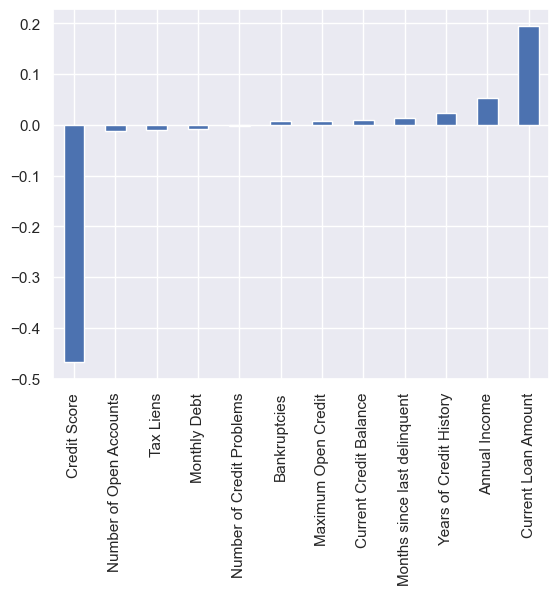

In [20]:
df_cleanning.select_dtypes(include = 'number').corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind= 'bar')

In [21]:
df_cleanning

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,loan_repaid
0,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,1
1,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,1
2,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,1
3,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,1
4,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,147070.0,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0,1
99996,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0,1
99997,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0,1
99998,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0,1


In [22]:
df_cleanning = df_cleanning.drop('Credit Score', axis = 1)  # the least related column we drop it

In [23]:
len(df_cleanning)

100000

In [24]:
df_cleanning['Months since last delinquent'].isnull().sum()

53141

In [25]:
# more than half data are missing. so we drop it
df_cleanning = df_cleanning.drop('Months since last delinquent', axis = 1)

In [26]:
df_cleanning.columns

Index(['Current Loan Amount', 'Term', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'loan_repaid'],
      dtype='object')

In [27]:
df_cleanning.isnull().sum()

Current Loan Amount              0
Term                             0
Annual Income                19154
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Bankruptcies                   204
Tax Liens                       10
loan_repaid                      0
dtype: int64

In [28]:
df_cleanning[['Annual Income', 'Maximum Open Credit','Bankruptcies','Tax Liens']]

,Annual Income,Maximum Open Credit,Bankruptcies,Tax Liens
0,1167493.0,416746.0,1.0,0.0
1,NaN,850784.0,0.0,0.0
2,2231892.0,750090.0,0.0,0.0
3,806949.0,386958.0,0.0,0.0
4,NaN,427174.0,0.0,0.0
...,...,...,...,...
99995,475437.0,658548.0,0.0,0.0
99996,1289416.0,509234.0,0.0,0.0
99997,1150545.0,537548.0,1.0,0.0
99998,1717524.0,738254.0,0.0,0.0


In [29]:
df_cleanning['Tax Liens'] = df_cleanning['Tax Liens'].fillna(0)

In [30]:
df['Maximum Open Credit']

0        416746.0
1        850784.0
2        750090.0
3        386958.0
4        427174.0
           ...   
99995    658548.0
99996    509234.0
99997    537548.0
99998    738254.0
99999     91014.0
Name: Maximum Open Credit, Length: 100000, dtype: float64

In [31]:
df_cleanning['Maximum Open Credit'] = df_cleanning['Maximum Open Credit'].fillna(760798) # mean value fill

In [32]:
avg_income = df_cleanning['Annual Income'].mean() 

In [33]:
df_cleanning['Annual Income']

0        1167493.0
1              NaN
2        2231892.0
3         806949.0
4              NaN
           ...    
99995     475437.0
99996    1289416.0
99997    1150545.0
99998    1717524.0
99999     935180.0
Name: Annual Income, Length: 100000, dtype: float64

In [58]:
avg_income= df_cleanning['Annual Income'].mean()
avg_income

1378276.559842169

In [59]:
df_cleanning['Annual Income'] = df_cleanning['Annual Income'].fillna(avg_income)

In [65]:
df_cleanning['Bankruptcies'] = df_cleanning['Bankruptcies'].fillna(0).astype(int)

## Dealing with categorical Da

In [36]:
df_cleanning.select_dtypes(include = 'object')

,Term,Years in current job,Home Ownership,Purpose
0,Short Term,8 years,Home Mortgage,Home Improvements
1,Short Term,10+ years,Home Mortgage,Debt Consolidation
2,Short Term,8 years,Own Home,Debt Consolidation
3,Long Term,3 years,Own Home,Debt Consolidation
4,Short Term,5 years,Rent,Debt Consolidation
...,...,...,...,...
99995,Short Term,7 years,Own Home,other
99996,Short Term,1 year,Rent,Debt Consolidation
99997,Short Term,6 years,Rent,Debt Consolidation
99998,Short Term,9 years,Rent,Debt Consolidation


In [37]:
df_cleanning['Years in current job'].unique()

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year', '2 years', '4 years', '9 years',
       '7 years', '1 year', nan, '6 years'], dtype=object)

In [38]:
df_cleanning['Years in current job'] = df_cleanning['Years in current job'].str.extract(r'(\d+)', expand=False)
#pd.numeric()

In [39]:
df_cleanning['Years in current job'] = pd.to_numeric(df_cleanning['Years in current job'], errors='coerce')

In [40]:
avg_years = pd.to_numeric(df_cleanning['Years in current job'], errors='coerce').mean().round()
df_cleanning['Years in current job'] = df_cleanning['Years in current job'].fillna(avg_years).astype(int)

In [41]:
df_cleanning['Years in current job'].unique()

array([ 8, 10,  3,  5,  1,  2,  4,  9,  7,  6])

<Axes: xlabel='Years in current job', ylabel='count'>

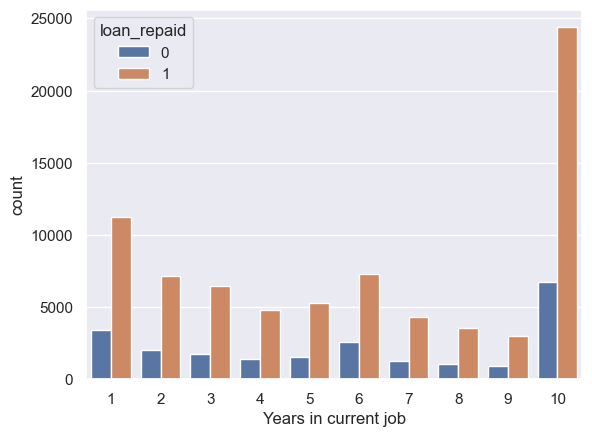

In [42]:
sns.countplot(data = df_cleanning, x= df_cleanning['Years in current job'], hue = 'loan_repaid')

In [43]:
term_sub_groups = pd.get_dummies(df_cleanning['Term'], drop_first= True, dtype = int)

term_sub_groups

,Short Term
0,1
1,1
2,1
3,0
4,1
...,...
99995,1
99996,1
99997,1
99998,1


In [44]:
df_cleanning = pd.concat([df_cleanning.drop('Term', axis = 1), term_sub_groups], axis = 1)

In [45]:
df_cleanning['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other', 'Business Loan',
       'Buy a Car', 'major_purchase', 'Take a Trip', 'Other', 'small_business', 'Medical Bills',
       'wedding', 'vacation', 'Educational Expenses', 'moving', 'renewable_energy'], dtype=object)

In [46]:
df_cleanning['Purpose'] = df_cleanning['Purpose'].replace('other', 'Other')

In [47]:
purposes_dummies = pd.get_dummies(df_cleanning['Purpose'], dtype = int)

In [48]:
df_cleanning = pd.concat([df_cleanning.drop('Purpose', axis = 1), purposes_dummies], axis = 1)

In [49]:
home_dummies = pd.get_dummies(df_cleanning['Home Ownership'].replace('HaveMortgage', 'Have Mortgage'), dtype = int)

In [50]:
df_cleanning = pd.concat([df_cleanning.drop('Home Ownership', axis = 1), home_dummies], axis = 1)

In [51]:
df_cleanning.isnull().sum()

Current Loan Amount              0
Annual Income                19154
Years in current job             0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              0
Bankruptcies                   204
Tax Liens                        0
loan_repaid                      0
Short Term                       0
Business Loan                    0
Buy House                        0
Buy a Car                        0
Debt Consolidation               0
Educational Expenses             0
Home Improvements                0
Medical Bills                    0
Other                            0
Take a Trip                      0
major_purchase                   0
moving                           0
renewable_energy                 0
small_business                   0
vacation                         0
wedding                          0
Have Mortgage       

In [52]:
df_cleanning[['Annual Income', 'Maximum Open Credit','Bankruptcies','Tax Liens']]

,Annual Income,Maximum Open Credit,Bankruptcies,Tax Liens
0,1167493.0,416746.0,1.0,0.0
1,NaN,850784.0,0.0,0.0
2,2231892.0,750090.0,0.0,0.0
3,806949.0,386958.0,0.0,0.0
4,NaN,427174.0,0.0,0.0
...,...,...,...,...
99995,475437.0,658548.0,0.0,0.0
99996,1289416.0,509234.0,0.0,0.0
99997,1150545.0,537548.0,1.0,0.0
99998,1717524.0,738254.0,0.0,0.0


In [53]:
df_cleanning['Tax Liens'].fillna(0).unique()

array([ 0.,  1.,  2.,  4.,  3.,  6.,  5., 11., 15.,  9.,  7., 10.])

In [66]:
df_cleanning.isnull().sum()

Current Loan Amount          0
Annual Income                0
Years in current job         0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
loan_repaid                  0
Short Term                   0
Business Loan                0
Buy House                    0
Buy a Car                    0
Debt Consolidation           0
Educational Expenses         0
Home Improvements            0
Medical Bills                0
Other                        0
Take a Trip                  0
major_purchase               0
moving                       0
renewable_energy             0
small_business               0
vacation                     0
wedding                      0
Have Mortgage                0
Home Mortgage                0
Own Home                     0
Rent                         0
dtype: i

In [95]:
df_cleanning.columns

Index(['Current Loan Amount', 'Annual Income', 'Years in current job',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'loan_repaid',
       'Short Term', 'Business Loan', 'Buy House', 'Buy a Car',
       'Debt Consolidation', 'Educational Expenses', 'Home Improvements',
       'Medical Bills', 'Other', 'Take a Trip', 'major_purchase', 'moving',
       'renewable_energy', 'small_business', 'vacation', 'wedding',
       'Have Mortgage', 'Home Mortgage', 'Own Home', 'Rent'],
      dtype='object')

## Section 3 Building the model

In [68]:
df_clean = df_cleanning.copy()

In [67]:
from sklearn.model_selection import train_test_split

In [69]:
#CODE HERE
X = df_clean.drop('loan_repaid', axis = 1).values
y = df_clean['loan_repaid'].values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Normalize the data

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()

In [74]:
X_train = scaler.fit_transform(X_train)

In [75]:
X_test = scaler.transform(X_test)

## Creating the Model

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [87]:
# CODE HERE
model = Sequential()

# Choose whatever number of layers/neurons you want.
model.add(Dense(79, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation = 'sigmoid'))

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')


In [88]:
model.fit(x = X_train, y = y_train, epochs = 35,batch_size=256, validation_data = (X_test, y_test))

Epoch 1/35
313/313 [==============================] - 2s 3ms/step - loss: 0.5194 - val_loss: 0.4967
Epoch 2/35
313/313 [==============================] - 1s 2ms/step - loss: 0.5025 - val_loss: 0.4975
Epoch 3/35
313/313 [==============================] - 1s 2ms/step - loss: 0.4994 - val_loss: 0.4950
Epoch 4/35
313/313 [==============================] - 1s 2ms/step - loss: 0.4990 - val_loss: 0.4947
Epoch 5/35
313/313 [==============================] - 1s 2ms/step - loss: 0.4990 - val_loss: 0.4950
Epoch 6/35
313/313 [==============================] - 1s 2ms/step - loss: 0.4977 - val_loss: 0.4950
Epoch 7/35
313/313 [==============================] - 1s 2ms/step - loss: 0.4980 - val_loss: 0.4958
Epoch 8/35
313/313 [==============================] - 1s 2ms/step - loss: 0.4969 - val_loss: 0.4946
Epoch 9/35
313/313 [==============================] - 1s 2ms/step - loss: 0.4970 - val_loss: 0.4952
Epoch 10/35
313/313 [==============================] - 1s 2ms/step - loss: 0.4969 - val_loss: 0.4945

## Evaluate the model

In [89]:
losses = pd.DataFrame(model.history.history)

<Axes: >

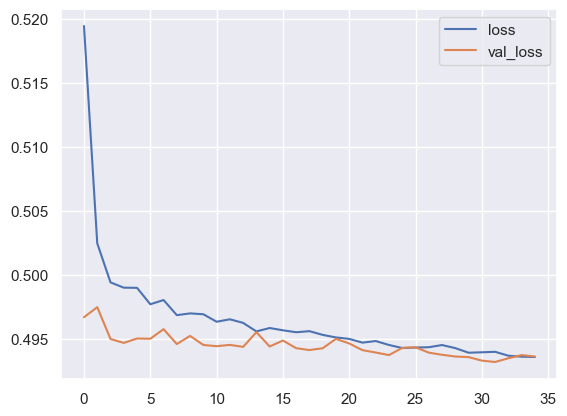

In [90]:
losses.plot()

In [91]:
predictions =(model.predict(X_test) > 0.5).astype(int)

625/625 [==============================] - 1s 787us/step


In [92]:
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.00      0.01      4517
           1       0.77      1.00      0.87     15483

    accuracy                           0.77     20000
   macro avg       0.76      0.50      0.44     20000
weighted avg       0.77      0.77      0.68     20000



In [94]:
print(confusion_matrix(y_test, predictions))

[[   12  4505]
 [    4 15479]]


### The model is 77% accurate which requires additional data and model improvement for more accuracy to reach 90%!